## $\color{red}{\text{Lecture Overview}}$
1. **Dimensionality reduction**
2. **Principal components analysis**

## $\color{red}{\text{Dimensionality reduction}}$

1. The **curse of dimensionality** arises when data analysis and modeling may be adversely affected by the explosion of data
2. The curse of dimensionality has the following negative effects
  - Datasets may have hundreds or thousands of variables
  - It may be computationally expensive to analyze the data
  - Some variables may capture noise
  - Some independent variables may be irrelevant to the dependent variable
3. **Dimensionality reduction** refers to the process of curbing the effects of the curse of dimensionality
  - We use statistical and heuristic methods to obtain a subset of variables that may explain the phenomena
  - We can also use dimensionality reduction techniques to visualize the data

## $\color{red}{\text{Principal components analysis (PCA)}}$

1. PCA reduces a set high-dimensional variables to a lower-dimensional set of variables called **principal components**
2. **Principal components** are linear combination of the original variables and are uncorrelated with each other
3. Initial principal components capture most variation in the data
4. The **loadings** of each variable in the principal component may give an indication of its importance
5. PCA is also used to visualize high-dimensional datasets

The PCA creates an equation of components multiplied by weights:

$$PCA = W_1 * x_1 + W_2 * x_2 + \cdots + W_n * x_n$$

### $\color{blue}{\text{Advantages of PCA}}$

- Principal components are uncorrelated
- PCA has many applications, making it very versatile

### $\color{blue}{\text{Disadvantages of PCA}}$

1. Does not seek to understand variable scales or distribution
2. It is affected by variable scales or units
  - Variables should be transformed
  - Variables should be standardized or normalized before PCA

## $\color{red}{\text{Import Required Packages}}$

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## $\color{red}{\text{Import Data}}$

In [2]:
df = pd.read_csv('/Users/dB/Documents/repos/github/bint-capstone/notebooks/data/housingData.csv')

In [3]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


## $\color{red}{\text{Analytic task}}$
1. Using the housing data, reduce the dimensions using PCA
2. Obtain variables coming out of the PCA

## $\color{red}{\text{Data transformation}}$


### $\color{blue}{\text{Standardization}}$

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [ ]:
curr_year = pd.Timestamp.now().year
df['building_age'] = curr_year - df['yr_built']


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,building_age
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,70
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,74
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,92
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,60
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,38


In [7]:
from sklearn.preprocessing import StandardScaler

# Drop IDs
to_drop = ['id','date','zipcode','yr_built','yr_renovated']
df2 = df.drop(to_drop, axis=1)

df2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,building_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,221900.0,70
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,538000.0,74
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,180000.0,92
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,604000.0,60
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,510000.0,38


In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df2)

standardized_data # dont we need to make this a df?

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.26071541,
        -0.86641874,  0.54489777],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.18786773,
        -0.00594021,  0.6810785 ],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.17237524,
        -0.98047774,  1.29389179],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.39414129,
        -0.37588065, -1.29354209],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.42051149,
        -0.38159993, -1.12331618],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.41794772,
        -0.58576282, -1.25949691]])

### $\color{blue}{\text{Component selection - explained variance approach}}$
1. The **explained variance** approach determines the number of principal components needed to retain a chosen percentage (e.g., 95%) of the total variance in the dataset

2. It ensures that enough components are selected to preserve most of the original data's information while reducing dimensionality.

Additionally, recall that for a dataset of $N$ features, you can have up to $N$ principal components. Obviously we want fewer than $N$ features as our result, this is just a guide for the process.


#### $\color{green}{\text{Advantages and disadvantages}}$
1. **Advantages**
  - Provides a quantitative and objective method for component selection, ensuring minimal information loss
2. **Disadvantages**
  - The threshold (e.g., 95%) is arbitrary and may lead to either too many or too few components being retained.

In [13]:
from sklearn.decomposition import PCA

# Apply PCA without specifying number of components (keep all features)
pca = PCA()
pca.fit(standardized_data)

# Compute Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

explained_variance

array([3.28656155e-01, 1.29294304e-01, 1.06159914e-01, 7.61496978e-02,
       6.53816159e-02, 5.09440408e-02, 4.62552929e-02, 3.88173578e-02,
       3.67291816e-02, 3.00585294e-02, 2.12131277e-02, 1.75315215e-02,
       1.56807580e-02, 1.42224478e-02, 1.18250426e-02, 1.10810133e-02,
       7.51174041e-17])

In [14]:
cumulative_variance

array([0.32865616, 0.45795046, 0.56411037, 0.64026007, 0.70564169,
       0.75658573, 0.80284102, 0.84165838, 0.87838756, 0.90844609,
       0.92965922, 0.94719074, 0.9628715 , 0.97709394, 0.98891899,
       1.        , 1.        ])

Pick a value within this array that satisfies how much variance you want explained, and use that as a threshold to select a number of principal components that explain that threshold of variance.

In [21]:
threshold = .90
n_components_thresh = np.argmax(cumulative_variance >= threshold) + 1 # find the max number of components

Is this like using the PMF to find the median?

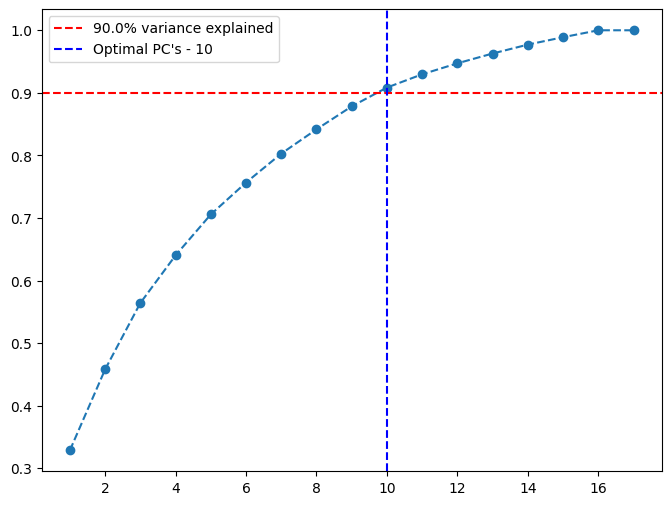

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{threshold*100}% variance explained') # line showing variance-explained threshold
plt.axvline(x=n_components_thresh, color='b', linestyle='--',label=f'Optimal PC\'s - {n_components_thresh}') # line showing optimal num of components
plt.legend()
plt.show()

We want **parsimony** - An explanation with as few variables as possible. This is known as the **Principle of Parsimony**

### $\color{blue}{\text{Component selection - the scree plot}}$
1. The **scree plot** visualizes the explained variance of each principal component, helping identify the optimal number of components to retain in PCA.

2. It allows for **elbow detection**, where the variance gain diminishes, indicating an ideal cutoff point for dimensionality reduction.

#### $\color{green}{\text{Advantages and disadvantages}}$
1. **Advantages**
  - Simple to interpret, provides a visual way to determine how many components to keep
2. **Disadvantages**
  - The "elbow" point is subjective and may not always be clearly defined

<function matplotlib.pyplot.show(close=None, block=None)>

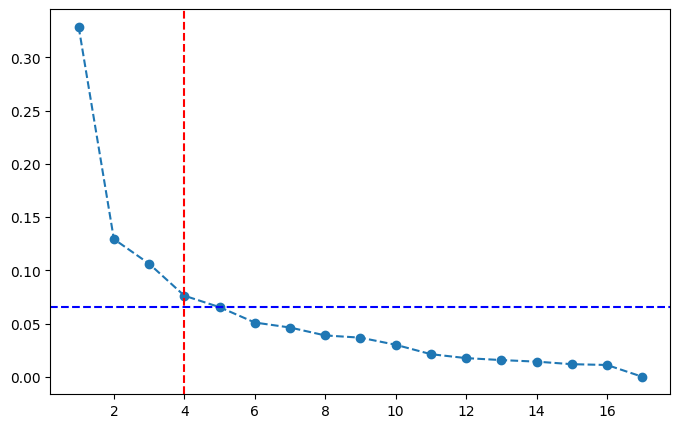

In [27]:
from kneed import KneeLocator

knee_locator = KneeLocator(range(1,len(explained_variance)+1), explained_variance,curve='convex', direction='decreasing')

scree_components = knee_locator.knee

# Plot

plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=explained_variance[scree_components], color='blue', linestyle='--', label=f'Elbow Explained Variance') # line showing variance-explained threshold
plt.axvline(x=scree_components, color='r', linestyle='--',label=f'KneeLocator Elbow - {scree_components}') # line showing optimal num of components
plt.show


This inversion of the plot creates a clearer "elbow" (where you see the sharpest decline). The axh/v lines also mathematically show where the "elbow" is.

In [30]:
exp_var_scree_method = np.sum(explained_variance[:scree_components])
exp_var_thresh = np.sum(explained_variance[:n_components_thresh])

print(f'Percentage of variance explained by {scree_components} components: {exp_var_scree_method:.2%}')
print(f'Percentage of variance explained by {n_components_thresh} components: {exp_var_thresh:.2%}')

Percentage of variance explained by 4 components: 64.03%
Percentage of variance explained by 10 components: 90.84%


From these methods, we want to use the 10 components that explain 90.84%

## $\color{red}{\text{Applying PCA}}$

In [36]:
# Conduct pca with optimal num of components
pca = PCA(n_components_thresh)
housing_pca = pca.fit_transform(standardized_data)

# See what's happening, convert into df
housing_pca_df = pd.DataFrame(housing_pca, columns=[f'PC{i+1}' for i in range(housing_pca.shape[1])]) # this is a list comprehension btw
housing_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.559576,-0.390721,0.016333,0.282908,-0.112909,-0.271385,0.213558,-0.248320,-0.872573,-0.087185
1,-0.026299,0.299523,-0.843729,0.247204,1.280942,-0.471283,-0.590427,0.336089,-0.188552,-0.008823
2,-2.892039,0.102178,0.182927,0.686772,1.360391,-0.008250,1.451650,-0.501816,-0.783135,0.104251
3,-0.850740,2.161896,0.019423,-1.741151,-0.856692,0.275158,-1.155702,0.686873,1.508809,-0.412923
4,-0.390186,-0.960203,-0.064851,0.146920,0.231865,-0.016982,1.497014,0.087628,-0.088560,-0.063445


Now we have a named PCA df

In [34]:
df2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,building_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,221900.0,70
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,538000.0,74
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,180000.0,92
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,604000.0,60
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,510000.0,38


How do we use the PCA df to boil down our original DF into a more concise amount of columns?

We can use the following methods:

### $\color{blue}{\text{Finding influential variables}}$

1. Compute the absolute **loadings** for each variable in the PCs
  - **Loadings** are the coefficients (weights) that show how much each original variable contributes to a principal component (PC)
  - The larger the absolute loadings, the more influence the variable has on the PC
2. Select variables with consistently high loadings across multiple
3. Set some selection criteria
  - For us, a variable is important if the absolute value of its loading exceeds the median load across all PCS

In [35]:
# In our PCA df, each column represents the weight
# The abs() value of the 'load', or weight, the more influential it is

# Display the loadings of each variable in each PC
var_names = df2.columns
housing_loadings = pd.DataFrame(pca.components_.T, index=var_names, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
housing_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
bedrooms,0.237067,0.097978,-0.048910,-0.406783,-0.195498,-0.064896,-0.195892,0.477480,-0.427722,0.342102
bathrooms,0.352553,-0.020713,-0.106613,-0.109422,-0.090264,-0.134005,-0.153045,0.150956,0.265689,0.000409
sqft_living,0.393238,0.117294,0.017791,-0.141985,-0.030645,-0.023364,-0.010124,-0.054510,-0.081100,-0.118257
sqft_lot,0.091369,-0.108046,0.619673,0.041611,0.203139,-0.118322,-0.210498,0.061709,0.028028,0.012207
floors,0.222183,-0.272722,-0.256816,0.218370,0.119533,0.097117,-0.444442,0.140476,0.227256,0.214457


In [39]:
# Compute abs() of all loading
abs_loadings = np.abs(pca.components_)

# Compute median loading across all PCs
med_loading = np.median(abs_loadings)

# Identify Important Variables (important = have loadings that exceed the median loading)
important_vars = np.any(abs_loadings > med_loading, axis=0)

# Extract var_names
important_features = np.array(var_names)[important_vars]
print(important_features)

['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'price' 'building_age']


Now evaluate the features. Do these make sense for evaluating the price of a house?

Apply this to the NBA Dataset!!!